Algorithm example/

Dual Moving Average Crossover Trading Signal

In [165]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from alpha_vantage.timeseries import TimeSeries


from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


In [166]:
# Your key here
key = 'EUUCJ727EVA4WPM3'
ts = TimeSeries(key)

In [167]:
# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

In [168]:

# Get the data, returns a tuple
# aapl_data is a pandas dataframe, aapl_meta_data is a dict
aapl_data, aapl_meta_data = ts.get_daily(symbol='AAPL')
# aapl_sma is a dict, aapl_meta_sma also a dict
aapl_sma, aapl_meta_sma = ti.get_sma(symbol='AAPL')


In [169]:
aapl_sma = ti.get_sma(symbol='AAPL')
aapl_data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-12-13,271.46,275.3000,270.930,275.15,32399589.0
2019-12-12,267.78,272.5599,267.321,271.46,34437042.0
2019-12-11,268.81,271.1000,268.500,270.77,19723391.0
2019-12-10,268.60,270.0700,265.860,268.48,22632383.0
2019-12-09,270.00,270.8000,264.910,266.92,32182645.0


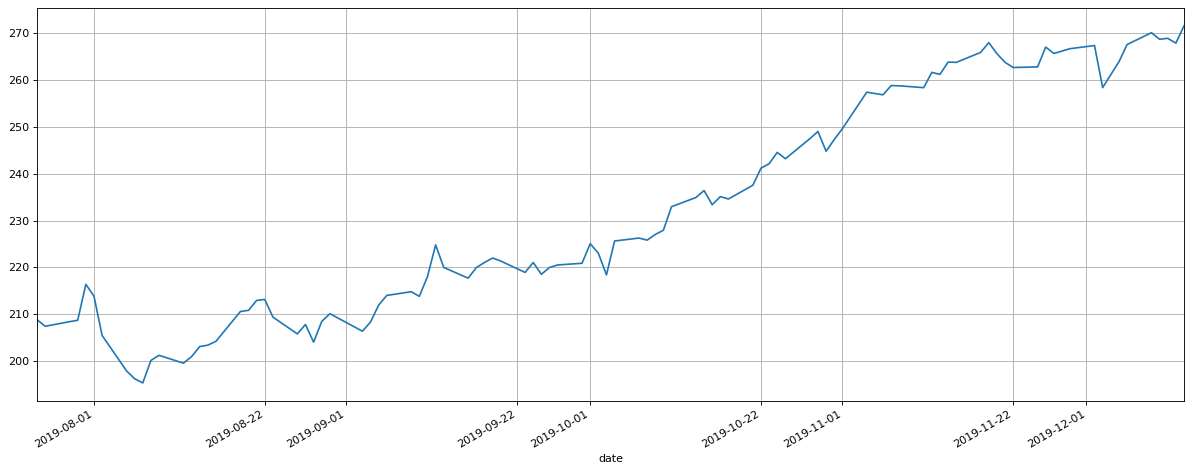

In [170]:
# Visualization closin=
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
aapl_data['1. open'].plot()
plt.tight_layout()
plt.grid()
plt.show()

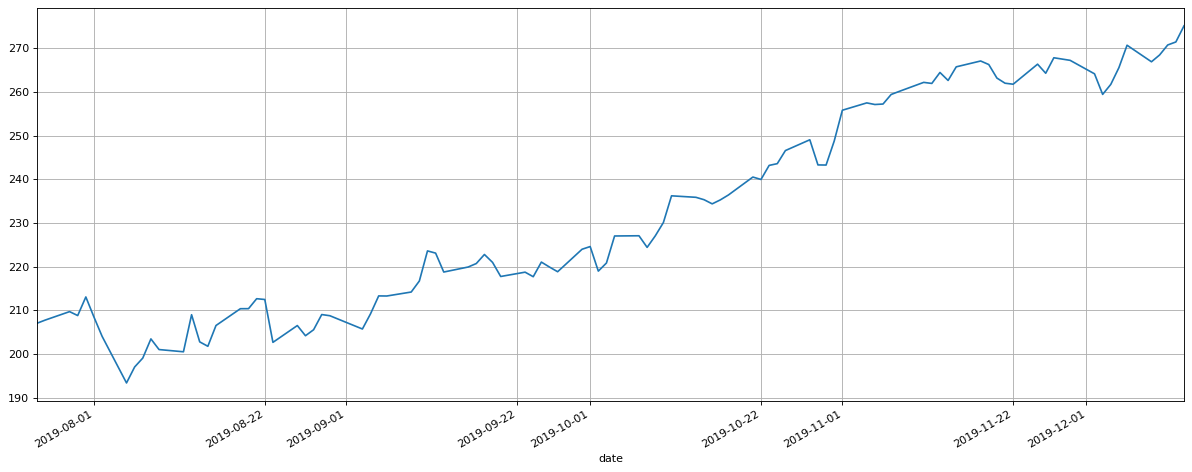

In [171]:
# Visualization closing
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
aapl_data['4. close'].plot()
plt.tight_layout()
plt.grid()
plt.show()

Generate a Dual Moving Average Crossover Trading Signal

In [185]:
# Grab just the `date` and `close` from the IEX dataset
signals_df = aapl_data.loc[:, ["4. close"]].copy()

# Set the short window and long windows
short_window = 25
long_window = 50

# Set the `date` column as the index
#signals_df = signals_df.set_index("0. date", drop=True)


# Generate the short and long moving averages (50 and 100 days, respectively)
signals_df["SMA25"] = signals_df["4. close"].rolling(window=short_window).mean()
signals_df["SMA50"] = signals_df["4. close"].rolling(window=long_window).mean()
signals_df["Signal"] = 0.0




In [186]:
# Generate the trading signal 0 or 1,
# where 0 is when the SMA50 is under the SMA100, and
# where 1 is when the SMA50 is higher (or crosses over) the SMA100
signals_df["Signal"][short_window:] = np.where(
    signals_df["SMA25"][short_window:] > signals_df["SMA50"][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
signals_df["Entry/Exit"] = signals_df["Signal"].diff()

signals_df.head(10)

,4. close,SMA25,SMA50,Signal,Entry/Exit
date,,,,,
2019-12-13,275.15,NaN,NaN,0.0,NaN
2019-12-12,271.46,NaN,NaN,0.0,0.0
2019-12-11,270.77,NaN,NaN,0.0,0.0
2019-12-10,268.48,NaN,NaN,0.0,0.0
2019-12-09,266.92,NaN,NaN,0.0,0.0
2019-12-06,270.71,NaN,NaN,0.0,0.0
2019-12-05,265.58,NaN,NaN,0.0,0.0
2019-12-04,261.74,NaN,NaN,0.0,0.0
2019-12-03,259.45,NaN,NaN,0.0,0.0


Plot Entry and Exit Points of Dual Moving Average Crossover Trading Strategy

In [187]:
# Visualize exit position relative to close price
exit = signals_df[signals_df['Entry/Exit'] == -1.0]["4. close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    xlabel= 'Date',
    height=400
)



# Visualize entry position relative to close price
entry = signals_df[signals_df['Entry/Exit'] == 1.0]["4. close"].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    xlabel= 'Date',
    height=400
)

# Visualize close price for the investment
security_close = signals_df[["4. close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    xlabel= 'Date',
    height=400
)

# Visualize moving averages
moving_avgs= signals_df[['SMA25', 'SMA50']].hvplot(
    ylabel='Price in $',
    xlabel= 'Date',
    height=400
)

# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I                        :Curve   [date]   (4. close)
   .NdOverlay.I                    :NdOverlay   [Variable]
      :Curve   [date]   (value)
   .Scatter.A_4_full_stop_close.I  :Scatter   [date]   (4. close)
   .Scatter.A_4_full_stop_close.II :Scatter   [date]   (4. close)